In [1]:
# Exploratory Data analysis (EDA): the process of gathering infomation from a dataset. 

In [38]:
# data wrangling
import pandas as pd
import numpy as np

# standard visualization library 
import matplotlib.pyplot as plt

# a great visualization library
import seaborn as sns 

# command to tell python to use seaborn for its styling
sns.set()

#will make the matplotlb charts appear in the notebook
%matplotlib inline

In [3]:
df = pd.read_csv ("NYPD_Arrest_Data__Year_to_Date_.csv")
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [5]:
# make column title lowercase
df.columns = map(str.lower, df.columns)

df.head()


,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,new georeferenced column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [6]:
df["arrest_boro"].value_counts()

K    31004
M    28948
B    25312
Q    24654
S     5381
Name: arrest_boro, dtype: int64

In [8]:
print(df.shape)

(115299, 19)


In [9]:
# give the summary of the data

df.describe()

,arrest_key,pd_cd,ky_cd,arrest_precinct,jurisdiction_code,x_coord_cd,y_coord_cd,latitude,longitude
count,1.152990e+05,115278.000000,115238.000000,115299.000000,115299.000000,1.152990e+05,115299.000000,115299.000000,115299.000000
mean,2.284194e+08,409.904422,245.079948,63.141320,0.926903,1.005121e+06,208091.168267,40.737796,-73.924662
std,3.485580e+06,276.987780,150.869676,35.104046,7.999952,2.159742e+04,30062.684808,0.082520,0.077886
min,2.224711e+08,0.000000,101.000000,1.000000,0.000000,9.142140e+05,121312.000000,40.499401,-74.251844
25%,2.253156e+08,113.000000,112.000000,34.000000,0.000000,9.914950e+05,185569.000000,40.675976,-73.973875
50%,2.285064e+08,339.000000,235.000000,62.000000,0.000000,1.004448e+06,206766.000000,40.734144,-73.927136
75%,2.314991e+08,705.000000,344.000000,101.000000,0.000000,1.017119e+06,235993.000000,40.814415,-73.881512
max,2.343530e+08,997.000000,995.000000,123.000000,97.000000,1.066556e+06,271820.000000,40.912723,-73.703000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   arrest_key                115299 non-null  int64  
 1   arrest_date               115299 non-null  object 
 2   pd_cd                     115278 non-null  float64
 3   pd_desc                   115238 non-null  object 
 4   ky_cd                     115238 non-null  float64
 5   ofns_desc                 115238 non-null  object 
 6   law_code                  115299 non-null  object 
 7   law_cat_cd                114221 non-null  object 
 8   arrest_boro               115299 non-null  object 
 9   arrest_precinct           115299 non-null  int64  
 10  jurisdiction_code         115299 non-null  int64  
 11  age_group                 115299 non-null  object 
 12  perp_sex                  115299 non-null  object 
 13  perp_race                 115299 non-null  o

In [14]:
# if there is nulls, drop the nulls
df.isnull().sum()

df = df.dropna()

df.isnull().sum()

arrest_key                  0
arrest_date                 0
pd_cd                       0
pd_desc                     0
ky_cd                       0
ofns_desc                   0
law_code                    0
law_cat_cd                  0
arrest_boro                 0
arrest_precinct             0
jurisdiction_code           0
age_group                   0
perp_sex                    0
perp_race                   0
x_coord_cd                  0
y_coord_cd                  0
latitude                    0
longitude                   0
new georeferenced column    0
dtype: int64

In [16]:
df.duplicated().sum() # there is no dupes

0

# plotting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='arrest_boro', ylabel='arrest_precinct'>

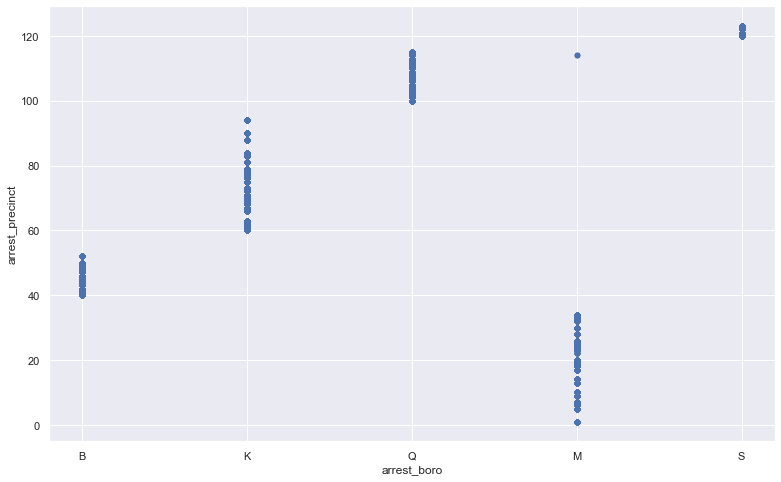

In [46]:
df.plot(kind="scatter", x = "arrest_boro", y= "arrest_precinct", figsize = (13,8), alpha = 0.33)

In [31]:
gb_sex = df.groupby("perp_sex")
gb_sex["perp_sex"].agg(["count"])



,count
perp_sex,
F,19334
M,94826


<AxesSubplot:xlabel='arrest_boro'>

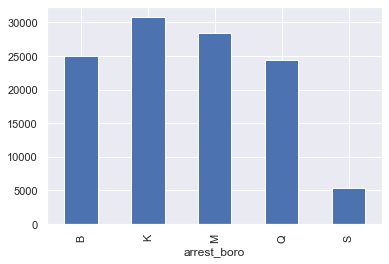

In [33]:
gb_boro_race = df.groupby("arrest_boro")["perp_race"].count()

sex_count.plot(kind="bar")

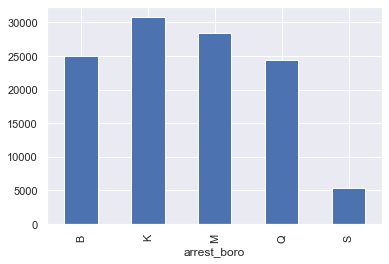

In [34]:
gb = df.groupby("arrest_boro")
sex_count = gb["perp_sex"].count()

sex_count.plot(kind="bar");

<AxesSubplot:xlabel='perp_race'>

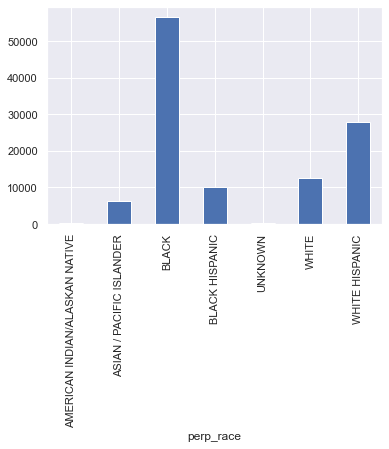

In [37]:
gb_race = df.groupby("perp_race")
arrest_count = gb_race["arrest_key"].count()

arrest_count.plot(kind="bar")

# Using seaborn to plot the graphs

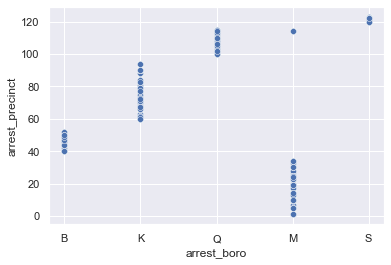

In [44]:
ax = sns.scatterplot(data= df, x = "arrest_boro", y= "arrest_precinct")

Text(0.5, 1.0, 'relationship with boro and precinct')

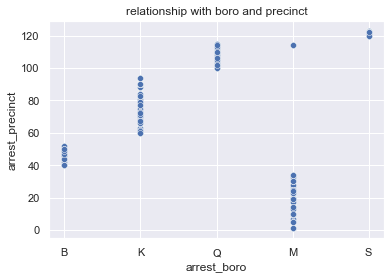

In [48]:
# seaborn plotting functions return  an axis(ax), 
# you can then set chart options using the ax

ax = sns.scatterplot(data= df, x = "arrest_boro", y= "arrest_precinct")
# set title
ax.set_title ("relationship with boro and precinct")

<ipython-input-51-2c85f6c20e6d>:6: UserWarning: Attempting to set identical bottom == top == 8 results in singular transformations; automatically expanding.
  ax.set_ylim(8, 8)


(7.6, 8.4)

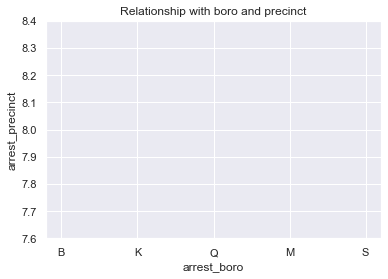

In [51]:
# set the y-axis

ax= sns.scatterplot (data= df, x= "arrest_boro", y= "arrest_precinct")
ax.set_title ("Relationship with boro and precinct")
# # ax.set_xlim(left= -5, right=5)
# ax.set_ylim(8, 8)

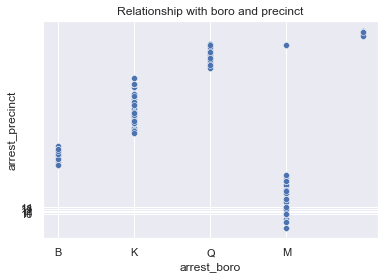

In [53]:
# set the number of ticks that are placed in the chart 


ax= sns.scatterplot (data= df, x= "arrest_boro", y= "arrest_precinct")
ax.set_title ("Relationship with boro and precinct")
ax.set_xticks(ticks=[0,1,2,3]); # the lines for the dots to be placed on
ax.set_yticks(range(10,15));


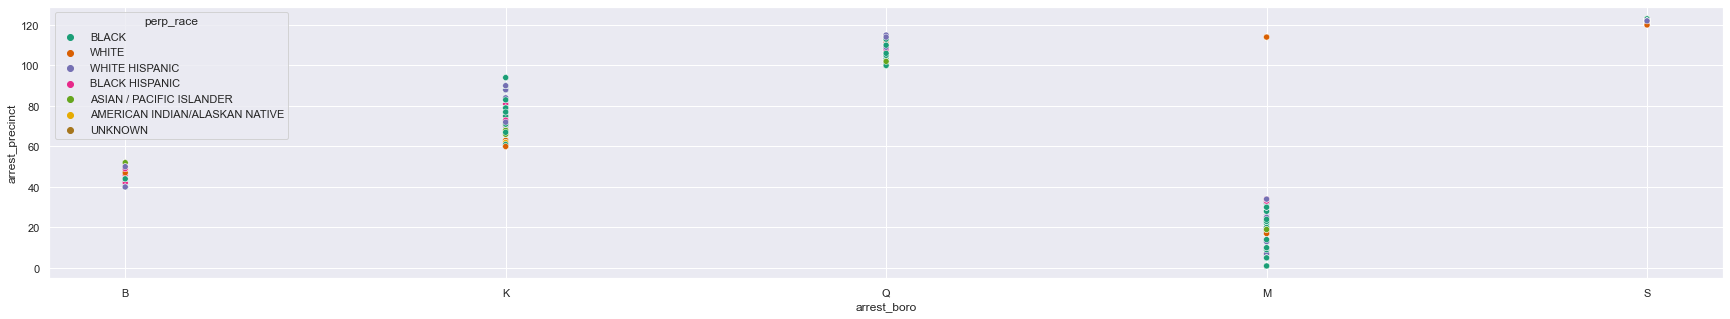

In [83]:
# hue will give a classification for graph 
sns.scatterplot (data= df, 
                x= "arrest_boro",
                y= "arrest_precinct",
                hue= "perp_race",
                palette= "Dark2",
                legend = "auto"
                );
sns.set(rc={"figure.figsize":(30, 5)})

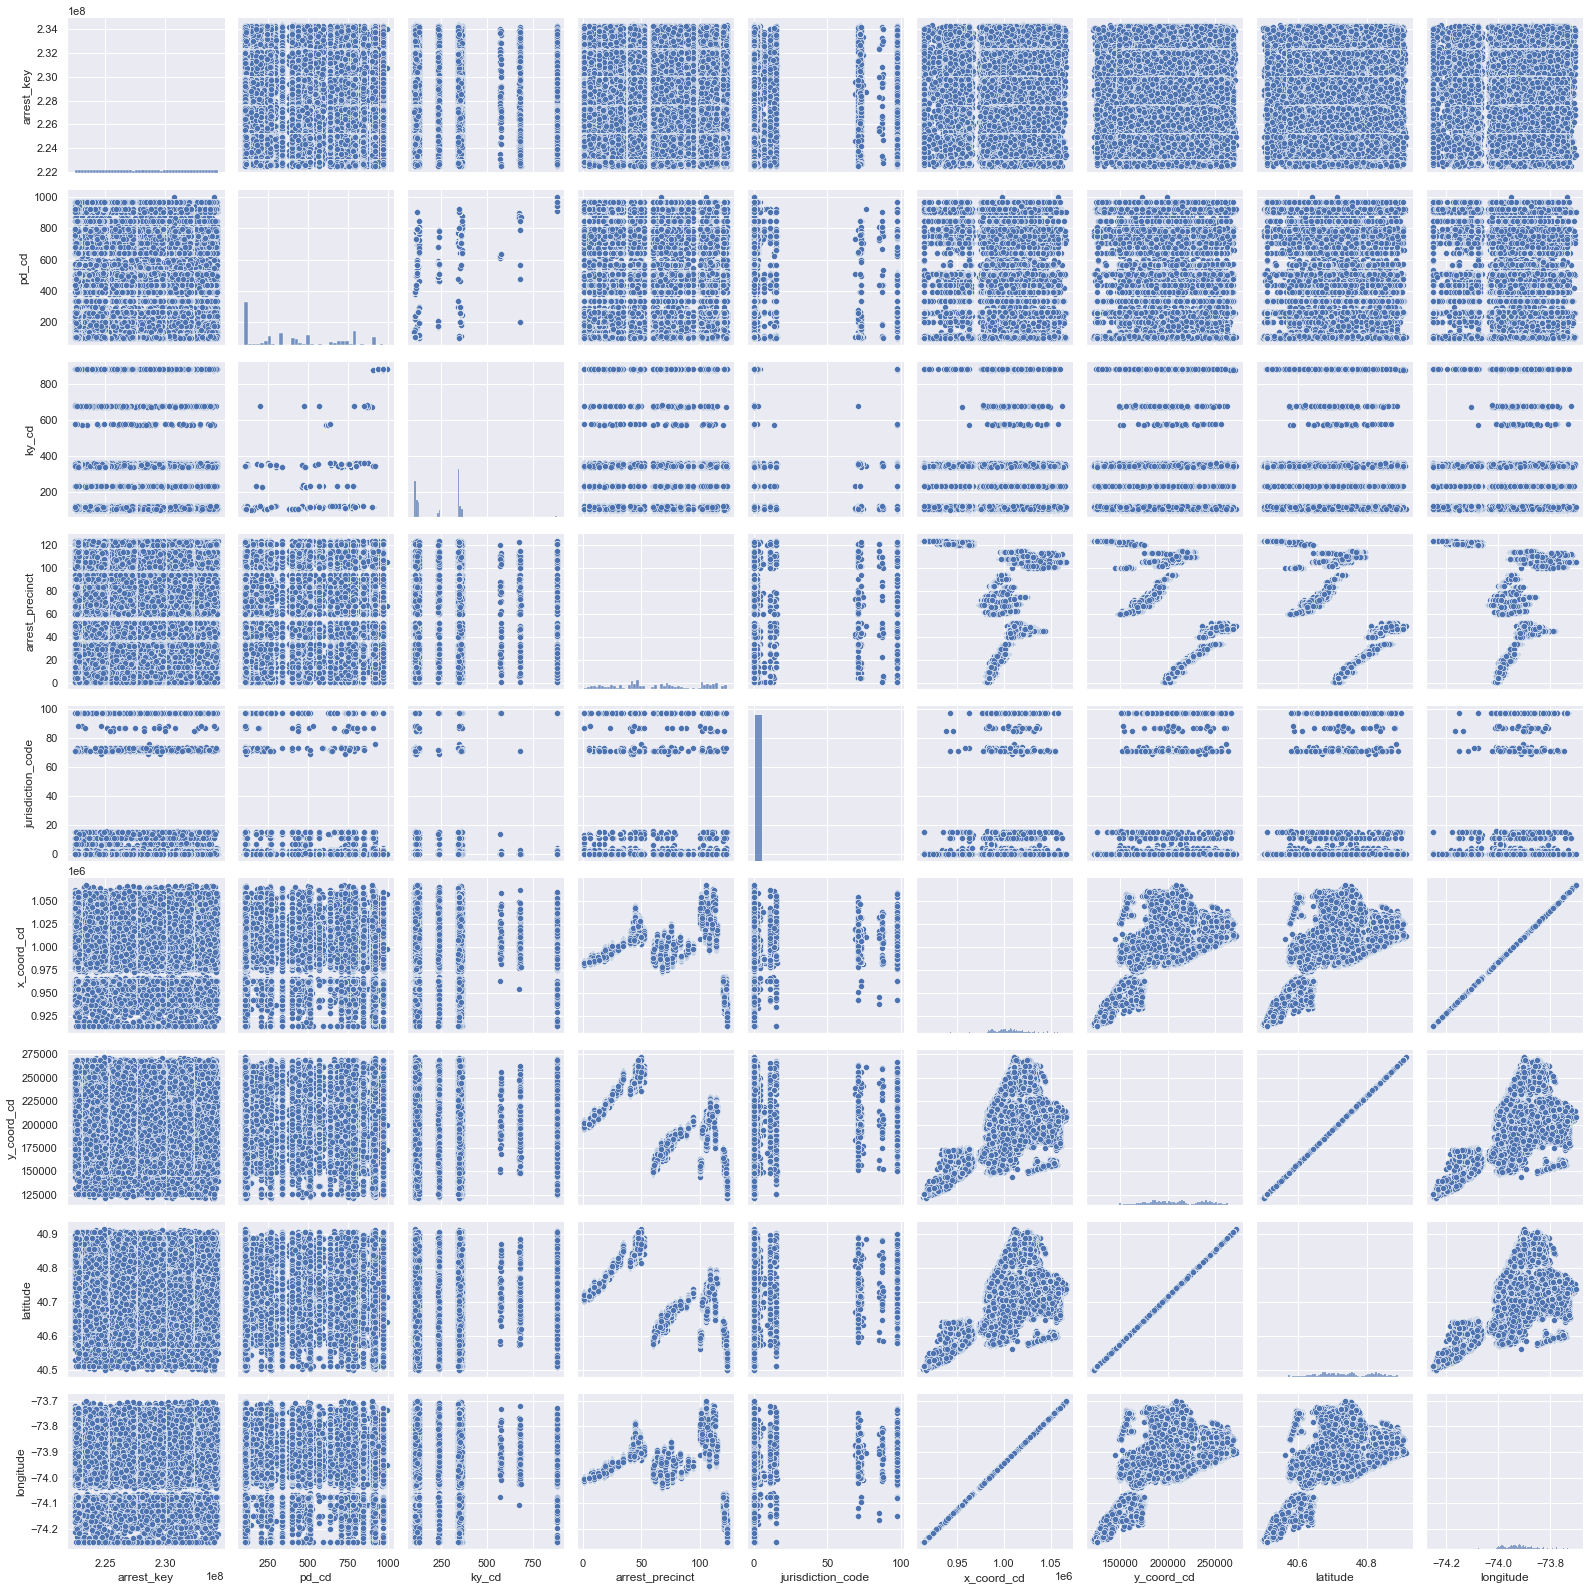

In [88]:
# sns.pairplot is the catch all ploting function 

sns.pairplot(df);

In [90]:
# this can be used to plot the line of best fit
# sns.regplot(data=df, x="arrest_boro",y= "arrest_precinct")